In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import data_visuals as dv
import database as db
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from scipy.stats import linregress

# Data Histogram

In [70]:
apba = db.load_all_apba()



apba['F_D'] = apba[['RateCDefence', "RateLWDefense", "RateRwDefence"]].max(axis=1)
apba["D_D"] = apba[['RateLDDefence', "RateRDDefence"]].max(axis=1)
#
apba


,Last,First,year,RateAssist,RateCDefence,RateClearing,RateCoincidentalMinor,RateCRank,RateCShotPct,RateCShotPlus,...,RateRWShotPlus,RateSDefence,RateShiftFatigue,RateShotBlocking,RateSkating,RateSpeed,RateSShotPct,RateSShotPlus,F_D,D_D
0,Aho,Sebastian,19,126,4,0,0,1,25,43,...,0,0,90,0,5,5,25,43,4,0
1,Jos. Anderson,Josh,19,44,0,0,0,NaN,0,0,...,53,0,90,0,4,4,23,53,5,0
2,Jo. Bailey,Josh,19,165,0,0,1,NaN,0,0,...,33,0,90,0,4,3,25,33,3,0
3,Barkov,Aleksander,19,112,4,0,1,1,34,59,...,0,0,90,0,4,4,34,59,4,0
4,Barzal,Mathew,19,153,2,0,1,1,20,28,...,0,0,90,0,5,5,20,28,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8498,Omark,Linus,14,51,0,0,1,NaN,0,0,...,0,0,90,0,3,3,0,3,1,0
8499,C.Brown,Chris,14,74,1,0,1,3.0,25,33,...,33,0,90,0,2,3,25,33,1,0
8500,Vanek,Thomas,14,139,0,0,1,NaN,0,0,...,36,0,90,0,3,3,22,36,2,0
8501,Moulson,Matt,14,97,0,0,1,NaN,0,0,...,0,0,90,0,3,3,26,38,3,0


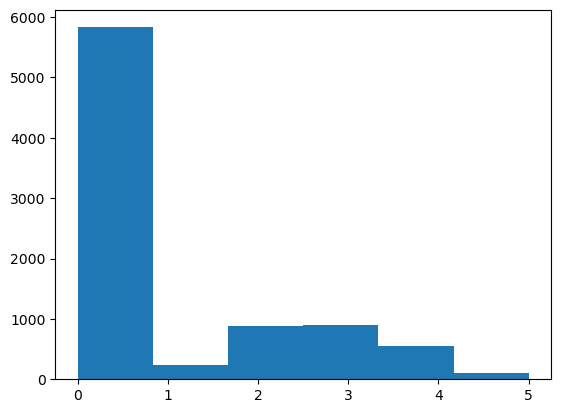

In [71]:
dv.data_histogram(apba, 'D_D', 6)

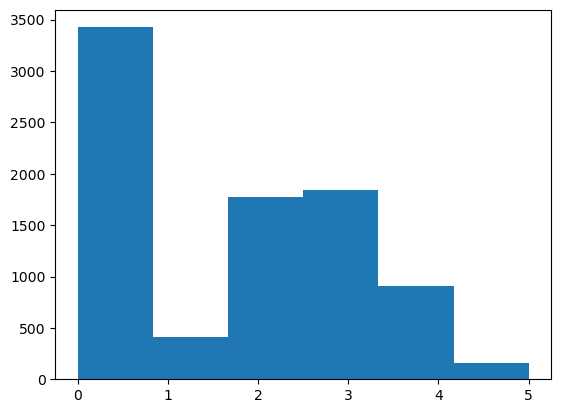

In [72]:
dv.data_histogram(apba, 'F_D', 6)

# Stat analysis

How to define defence
We propose the following metrics:
1. DzStart %
2. GA/60
3. Hits
4. xGA/60
5. CorsiAgainst/60
6. FenwickAgainst/60

One Key element that should be obvious is the need to seperate forward from defence.


In [73]:
real_data = pd.read_csv('HockeyRef_Data_Files/Hockey-Ref_Player_Data_2022-23.csv')
real_data.head()

,UID,Player,Age,Tm,Pos,GP,G,A,PTS,+/-,...,TotPPGF,TotGA,TotPPGA,PlusMin,XGF,XGA,XPlusMin,OPS,DPS,TotPS
0,abruzni01,Nicholas Abruzzese,23.0,TOR,C,2,0,2,2,1,...,1,0,0,1,0.5,0.7,-0.1,0.1,0.1,0.2
1,acciano01,Noel Acciari,31.0,TOT,C,77,14,9,23,-4,...,0,57,19,-4,37.3,38.9,-1.6,0.5,1.1,1.5
2,addisca01,Calen Addison,22.0,MIN,D,62,3,26,29,-17,...,38,48,0,-17,30.9,30.8,0.1,1.9,1.3,3.2
3,afanaeg01,Egor Afanasyev,22.0,NSH,LW,17,1,0,1,-7,...,0,10,0,-7,5.1,7.6,-2.5,-0.3,0.0,-0.3
4,agozzan01,Andrew Agozzino,32.0,SJS,LW,4,1,2,3,-1,...,0,4,0,-1,3.7,2.3,1.4,0.2,0.0,0.2


In [74]:
small = real_data.filter(items=['Player', 'Pos', 'GP', 'ATOI', 'BLK',
                                'CorsiForPerc', 'FenwickPerc',
                        'CorsiForPercRel', 'FenwickPercRel',
                        'DZoneStartPerc', 'EPlusMinus', 'GAPer60', 'XGA'])

small

,Player,Pos,GP,ATOI,BLK,CorsiForPerc,FenwickPerc,CorsiForPercRel,FenwickPercRel,DZoneStartPerc,GAPer60,XGA
0,Nicholas Abruzzese,C,2,8:59,0,50.0,52.4,-11.1,-10.4,60.0,0.0,0.7
1,Noel Acciari,C,77,14:19,81,44.7,47.7,-3.3,-0.4,62.5,2.8,38.9
2,Calen Addison,D,62,16:07,38,50.9,50.3,0.9,-0.6,40.6,3.5,30.8
3,Egor Afanasyev,LW,17,10:51,13,40.7,39.1,-0.6,-2.5,63.6,3.3,7.6
4,Andrew Agozzino,LW,4,16:22,4,36.7,38.2,-7.6,-5.2,60.0,4.2,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...
946,Mika Zibanejad,C,82,19:58,48,51.4,52.3,1.9,2.6,51.5,2.1,49.4
947,Radim Zohorna,F,10,8:35,2,53.2,52.4,-1.8,-2.6,51.7,4.8,4.3
948,Artem Zub,D,53,20:15,67,49.9,51.2,-3.0,-2.1,55.2,2.4,39.0
949,Mats Zuccarello,LW,78,20:12,51,53.0,53.3,4.8,4.5,35.1,2.7,48.0


In [75]:
def convert_time(atoi: str) -> int:
    """ Converts a string represnetation of time on ice to
    a float representation of time on ice in minutes.

    params:
        atoi: string representation of time on ice in the format
        'MM:SS'
    returns:
        int representation of time on ice in seconds.
    """

    times = atoi.split(':')
    return int(times[0]) * 60 + int(times[1])
small['ATOI'] = small.apply(lambda x: convert_time(x['ATOI']), axis=1)

In [76]:
small['exGA_60'] = small['XGA'] / small['GP'] / small['ATOI'] * 3600
small['BLK_60'] = small['BLK'] / small['GP'] / small['ATOI'] * 3600
small

,Player,Pos,GP,ATOI,BLK,CorsiForPerc,FenwickPerc,CorsiForPercRel,FenwickPercRel,DZoneStartPerc,GAPer60,XGA,exGA_60,BLK_60
0,Nicholas Abruzzese,C,2,539,0,50.0,52.4,-11.1,-10.4,60.0,0.0,0.7,2.337662,0.000000
1,Noel Acciari,C,77,859,81,44.7,47.7,-3.3,-0.4,62.5,2.8,38.9,2.117231,4.408630
2,Calen Addison,D,62,967,38,50.9,50.3,0.9,-0.6,40.6,3.5,30.8,1.849418,2.281749
3,Egor Afanasyev,LW,17,651,13,40.7,39.1,-0.6,-2.5,63.6,3.3,7.6,2.472215,4.228788
4,Andrew Agozzino,LW,4,982,4,36.7,38.2,-7.6,-5.2,60.0,4.2,2.3,2.107943,3.665988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,Mika Zibanejad,C,82,1198,48,51.4,52.3,1.9,2.6,51.5,2.1,49.4,1.810334,1.759029
947,Radim Zohorna,F,10,515,2,53.2,52.4,-1.8,-2.6,51.7,4.8,4.3,3.005825,1.398058
948,Artem Zub,D,53,1215,67,49.9,51.2,-3.0,-2.1,55.2,2.4,39.0,2.180294,3.745632
949,Mats Zuccarello,LW,78,1212,51,53.0,53.3,4.8,4.5,35.1,2.7,48.0,1.827875,1.942117


How does corsi, exGA and fenwick correlate with GA/60

In [77]:
colors = {'D': 'red', 'F': 'blue', 'LW': 'blue', 'RW': 'blue', 'C': 'blue', 'W': 'blue'}

In [78]:
small = small[small['GP'] > 20]


In [79]:
forwards = small[small['Pos'].isin(['C', 'LW', 'RW', 'W'])]
defence = small[small['Pos'].isin(['D'])]

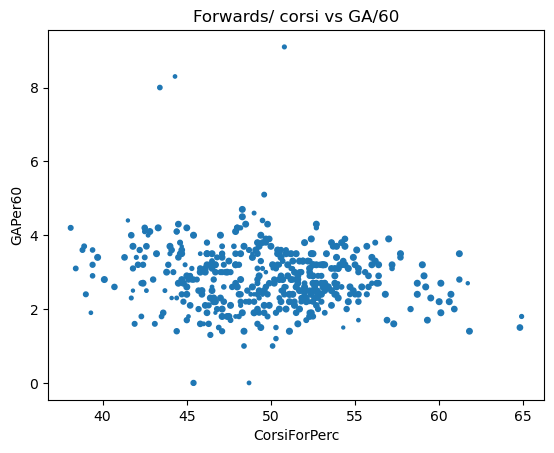

In [80]:
plt.scatter(forwards['CorsiForPerc'], forwards['GAPer60'], s=forwards['GP'] / 5)
plt.xlabel('CorsiForPerc')
plt.ylabel('GAPer60')
plt.title('Forwards/ corsi vs GA/60')
plt.show()


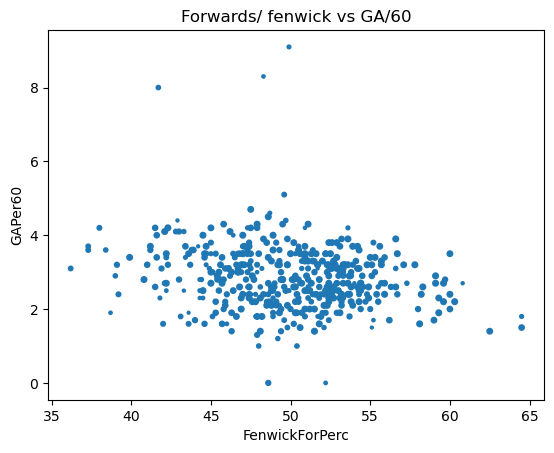

In [81]:
plt.scatter(forwards['FenwickPerc'], forwards['GAPer60'], s=forwards['GP'] / 5)
plt.xlabel('FenwickForPerc')
plt.ylabel('GAPer60')
plt.title('Forwards/ fenwick vs GA/60')
plt.show()

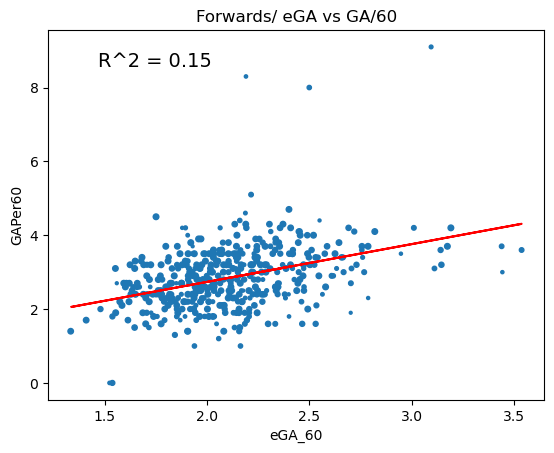

In [82]:

plt.scatter(forwards['exGA_60'], forwards['GAPer60'], s=forwards['GP'] / 5)

slope, intercept = np.polyfit(forwards['exGA_60'], forwards['GAPer60'], 1)
line_of_best_fit = slope * forwards['exGA_60'] + intercept
plt.plot(forwards['exGA_60'], line_of_best_fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope, intercept))

slope, intercept, r_value, p_value, std_err = linregress(forwards['exGA_60'], forwards['GAPer60'])
r_squared = r_value ** 2

plt.text(0.1, 0.9, f'R^2 = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=14)

plt.xlabel('eGA_60')
plt.ylabel('GAPer60')
plt.title('Forwards/ eGA vs GA/60')
plt.show()

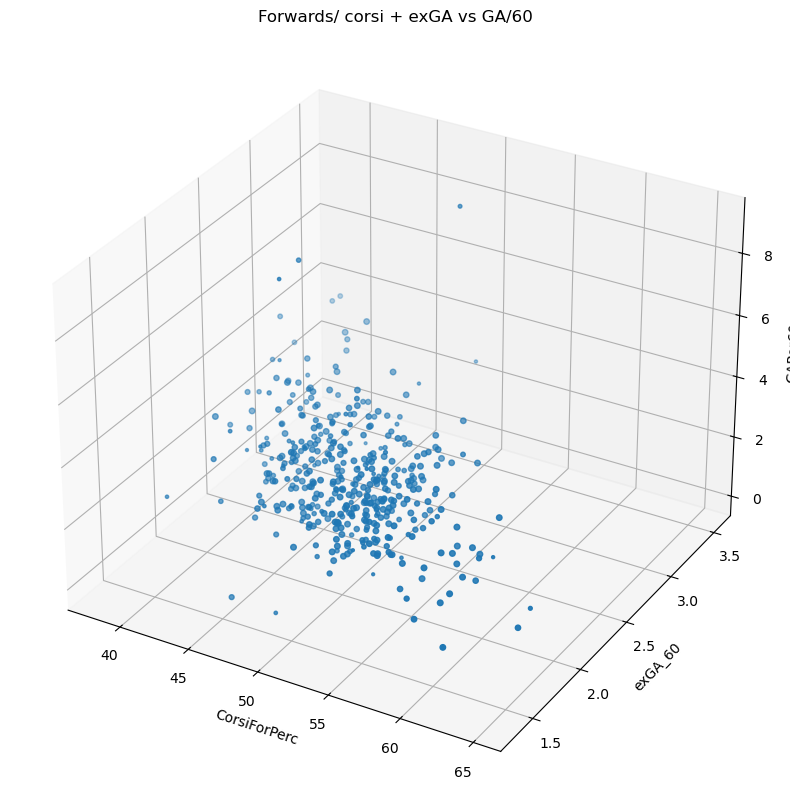

In [83]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(forwards['CorsiForPerc'], forwards['exGA_60'], forwards['GAPer60'], s=forwards['GP'] / 5)

ax.set_xlabel('CorsiForPerc')
ax.set_ylabel('exGA_60')
ax.set_zlabel('GAPer60')

ax.set_title('Forwards/ corsi + exGA vs GA/60')
plt.show()

In [84]:
fig = px.scatter_3d(forwards, x='CorsiForPerc', y='exGA_60', z='GAPer60', size='GP', opacity=0.7, title='Forwards/ corsi + exGA vs GA/60')
fig.show()

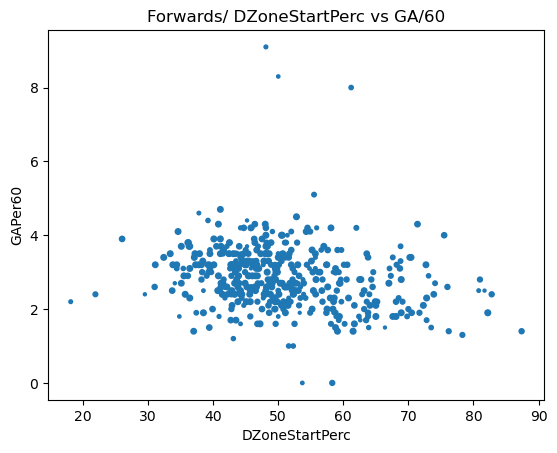

In [85]:
plt.scatter(forwards['DZoneStartPerc'], forwards['GAPer60'], s=forwards['GP'] / 5)
plt.xlabel('DZoneStartPerc')
plt.ylabel('GAPer60')
plt.title('Forwards/ DZoneStartPerc vs GA/60')
plt.show()

Text(0.5, 1.0, 'Defence/ corsi vs GA/60')

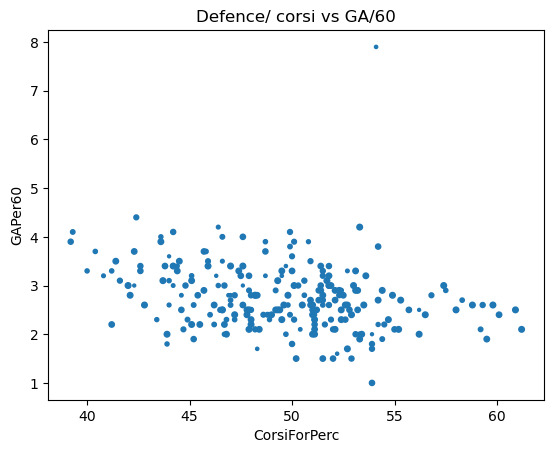

In [86]:
plt.scatter(defence['CorsiForPerc'], defence['GAPer60'], s=defence['GP'] / 5)
plt.xlabel('CorsiForPerc')
plt.ylabel('GAPer60')
plt.title('Defence/ corsi vs GA/60')

Text(0.5, 1.0, 'Defence/ fenwick vs GA/60')

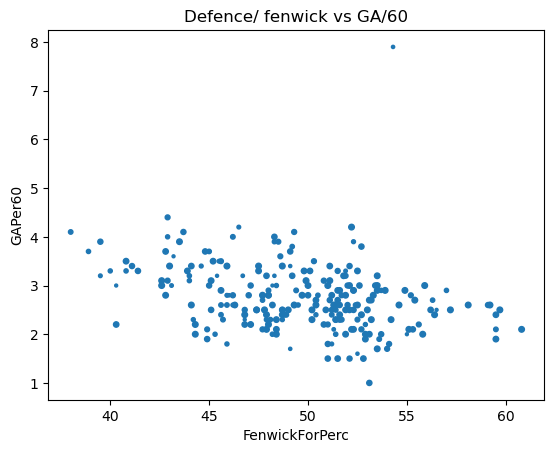

In [87]:
plt.scatter(defence['FenwickPerc'], defence['GAPer60'], s=defence['GP'] / 5)
plt.xlabel('FenwickForPerc')
plt.ylabel('GAPer60')
plt.title('Defence/ fenwick vs GA/60')

Text(0.5, 1.0, 'Defence/ eGA vs GA/60')

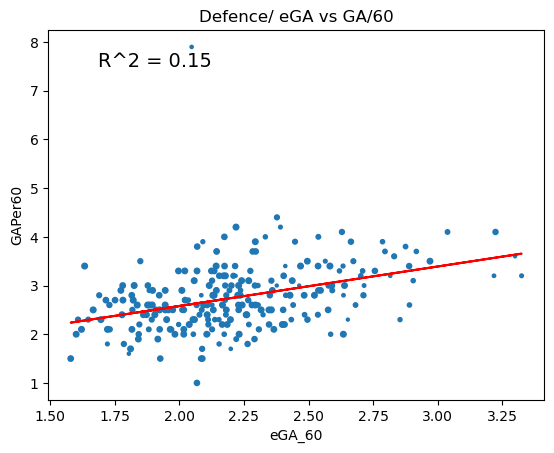

In [88]:
plt.scatter(defence['exGA_60'], defence['GAPer60'], s=defence['GP'] / 5)

slope, intercept = np.polyfit(defence['exGA_60'], defence['GAPer60'], 1)
line_of_best_fit = slope * defence['exGA_60'] + intercept
plt.plot(defence['exGA_60'], line_of_best_fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope, intercept))

slope, intercept, r_value, p_value, std_err = linregress(defence['exGA_60'], defence['GAPer60'])
r_squared = r_value ** 2

plt.text(0.1, 0.9, f'R^2 = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=14)

plt.xlabel('eGA_60')
plt.ylabel('GAPer60')
plt.title('Defence/ eGA vs GA/60')

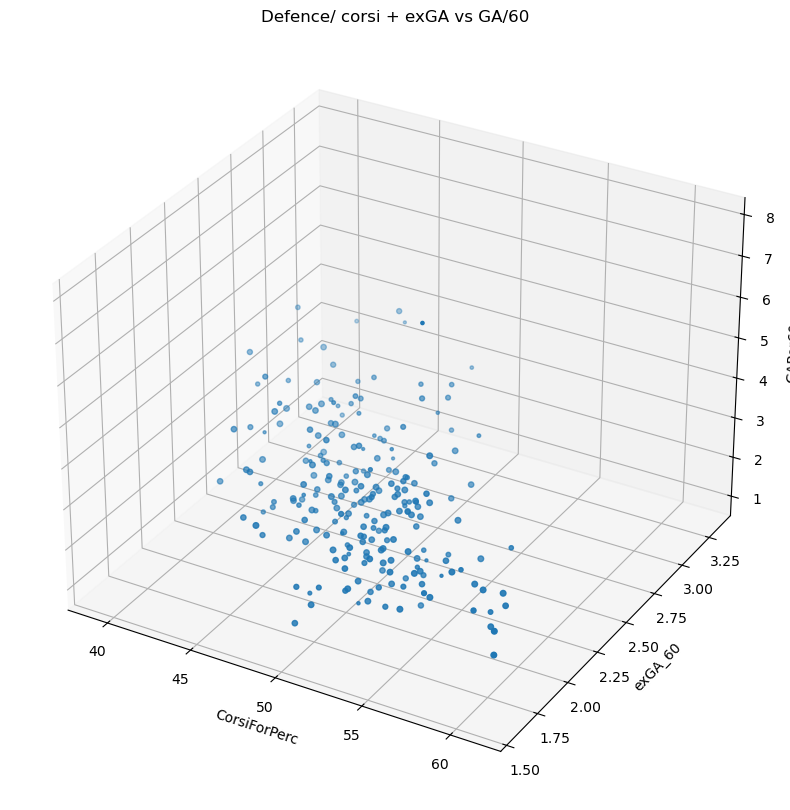

In [89]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(defence['CorsiForPerc'], defence['exGA_60'], defence['GAPer60'], s=defence['GP'] / 5)


ax.set_xlabel('CorsiForPerc')
ax.set_ylabel('exGA_60')
ax.set_zlabel('GAPer60')

ax.set_title('Defence/ corsi + exGA vs GA/60')
plt.show()

In [90]:
fig = px.scatter_3d(defence, x='CorsiForPerc', y='exGA_60', z='GAPer60', size='GP', opacity=0.7, title='Defence/ corsi + exGA vs GA/60')
fig.show()

Text(0.5, 1.0, 'Defence/ DZoneStartPerc vs GA/60')

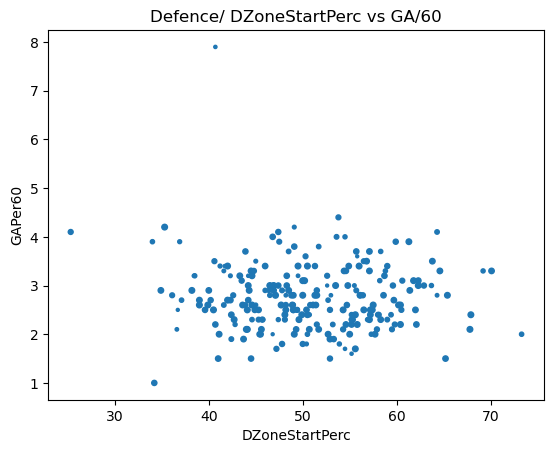

In [91]:
plt.scatter(defence['DZoneStartPerc'], defence['GAPer60'], s=defence['GP'] / 5)
plt.xlabel('DZoneStartPerc')
plt.ylabel('GAPer60')
plt.title('Defence/ DZoneStartPerc vs GA/60')

Text(0.5, 1.0, 'Defence/ BLK vs GA/60')

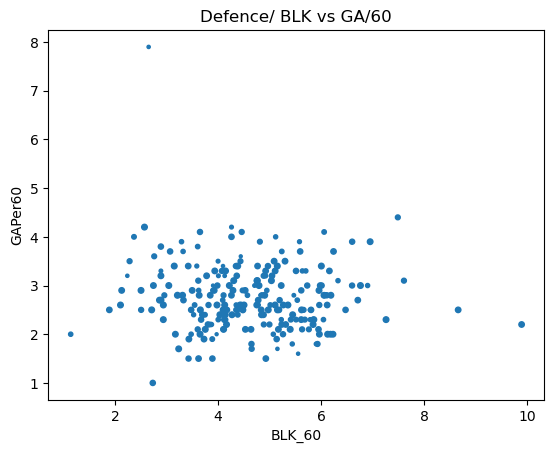

In [92]:
plt.scatter(defence['BLK_60'], defence['GAPer60'], s=defence['GP'] / 5)
plt.xlabel('BLK_60')
plt.ylabel('GAPer60')
plt.title('Defence/ BLK vs GA/60')

Text(0.5, 1.0, 'Defence/ BLK vs GA/60')

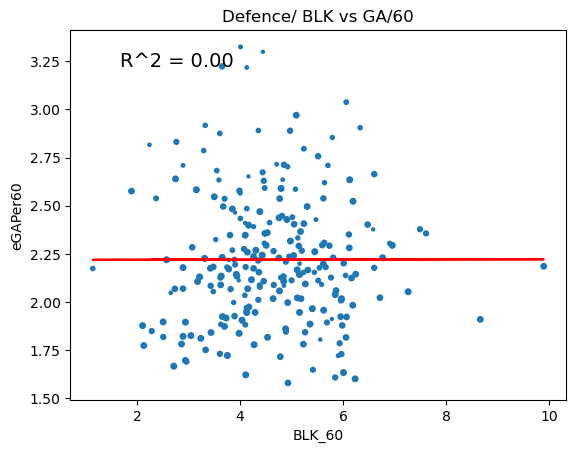

In [93]:

plt.scatter(defence['BLK_60'], defence['exGA_60'], s=defence['GP'] / 5)

slope, intercept = np.polyfit(defence['BLK_60'], defence['exGA_60'], 1)
line_of_best_fit = slope * defence['BLK_60'] + intercept
plt.plot(defence['BLK_60'], line_of_best_fit, 'r', label='y={:.2f}x+{:.2f}'.format(slope, intercept))

slope, intercept, r_value, p_value, std_err = linregress(defence['BLK_60'], defence['exGA_60'])

r_squared = r_value ** 2

plt.text(0.1, 0.9, f'R^2 = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=14)
plt.xlabel('BLK_60')
plt.ylabel('eGAPer60')
plt.title('Defence/ BLK vs GA/60')